In [1]:
import os
import numpy as np
import pandas as pd
from scipy import special, stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import fc_methods as fc

### Example comparison of correlation methods on random data

In [3]:
rand_matrix = np.random.randint(1,100,(300,50))

In [4]:
pearson_random, pearson_p = fc.pearson_corr(rand_matrix)

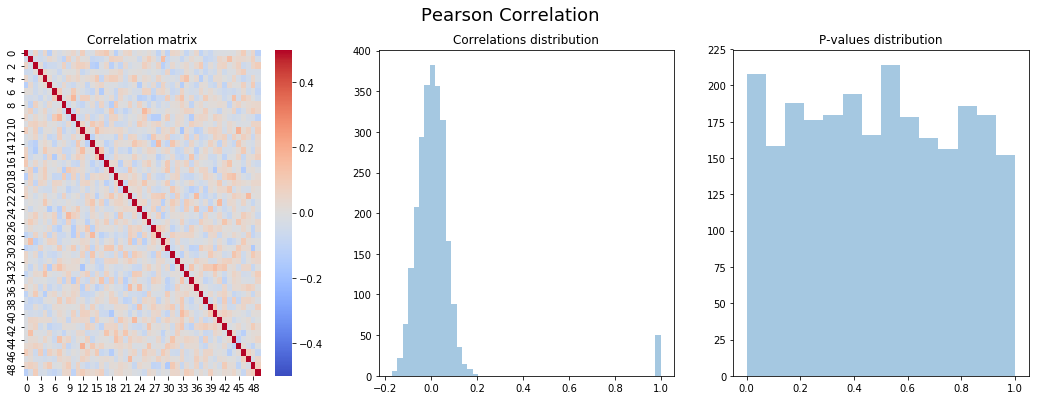

In [5]:
f, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(pearson_random, vmin=-0.5, vmax=0.5, cmap='coolwarm', ax=axes[0]);
sns.distplot(pearson_random.flatten(), kde=False, ax=axes[1]);
sns.distplot(pearson_p.flatten(), kde=False, ax=axes[2]);
axes[0].set_title('Correlation matrix');
axes[1].set_title('Correlations distribution');
axes[2].set_title('P-values distribution');
plt.suptitle('Pearson Correlation', fontsize=18);

In [6]:
partial_random, partial_p = fc.partial_corr(rand_matrix)

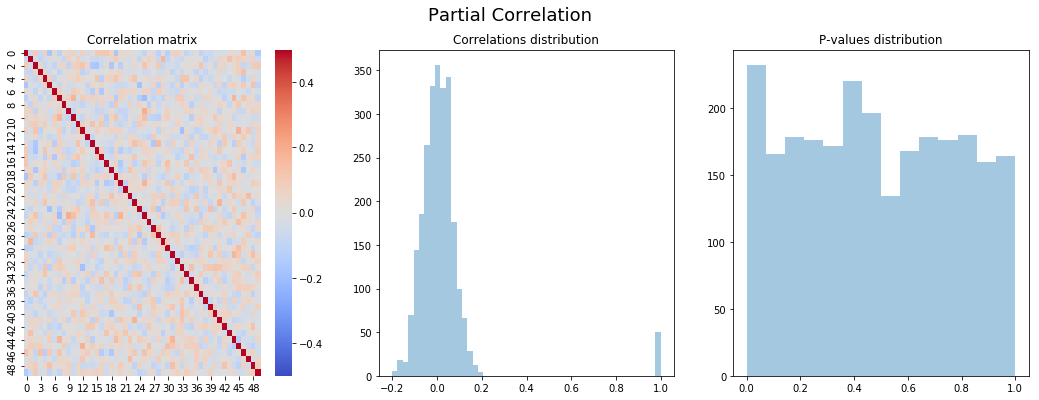

In [7]:
f, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(partial_random, vmin=-0.5, vmax=0.5, cmap='coolwarm', ax=axes[0]);
sns.distplot(partial_random.flatten(), kde=False, ax=axes[1]);
sns.distplot(partial_p.flatten(), kde=False, ax=axes[2]);
axes[0].set_title('Correlation matrix');
axes[1].set_title('Correlations distribution');
axes[2].set_title('P-values distribution');
plt.suptitle('Partial Correlation', fontsize=18);

### Example on fMRI resting-state data

In [8]:
path = '../datasets/fMRI/HCP_parcellated_smoothing5_100subjects_Glasser_restingstate_day1/'
label_path = '../datasets/fMRI/labels_Glasser.csv'
labels = pd.read_csv(label_path, header=None)[0].values

In [9]:
pearson = {}
files = os.listdir(path)
size = len(files)
for num, file in enumerate(files):
    if file.endswith('.csv'):
        pearson[file[:-4]] = (pd.DataFrame(fc.pearson_corr(pd.read_csv(path+'100307.csv', header=None))[0], 
                                          index=labels, columns=labels),
                              pd.DataFrame(fc.pearson_corr(pd.read_csv(path+'100307.csv', header=None))[1], 
                                          index=labels, columns=labels))
    print('({}/{})'.format(num+1, size) + file + ' done!', end='\r', flush=True)

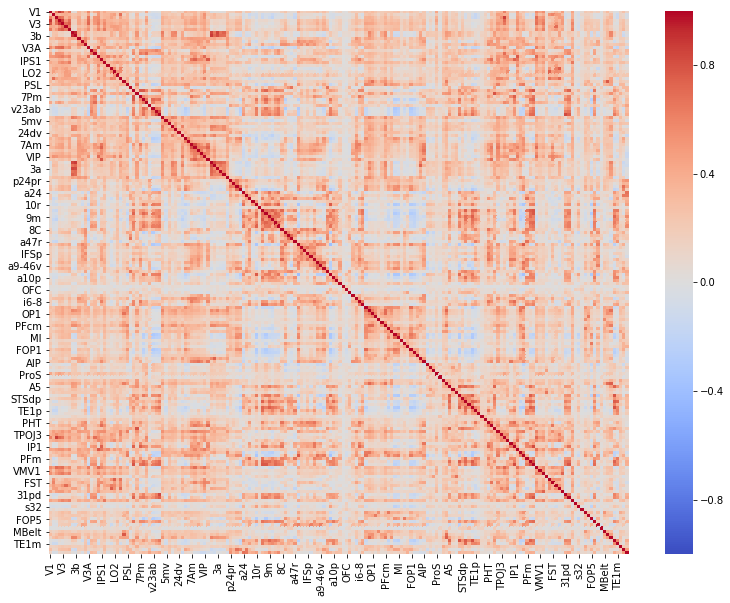

In [10]:
plt.figure(figsize=(13,10))
sns.heatmap(list(pearson.values())[1][0], vmin=-1, vmax=1, cmap='coolwarm');

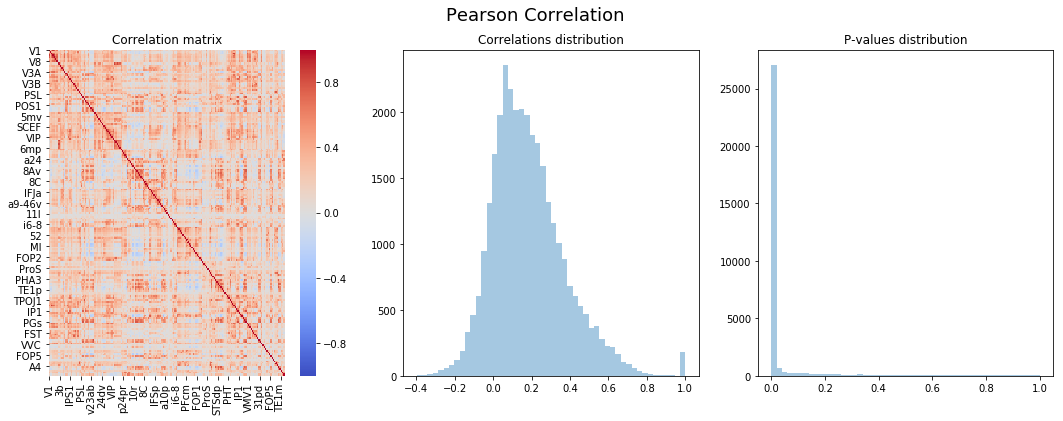

In [11]:
f, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(list(pearson.values())[1][0], vmin=-1, vmax=1, cmap='coolwarm', ax=axes[0]);
sns.distplot(list(pearson.values())[1][0].values.flatten(), kde=False, ax=axes[1]);
sns.distplot(list(pearson.values())[1][1].values.flatten(), kde=False, ax=axes[2]);
axes[0].set_title('Correlation matrix');
axes[1].set_title('Correlations distribution');
axes[2].set_title('P-values distribution');
plt.suptitle('Pearson Correlation', fontsize=18);

In [12]:
partial = {}
files = os.listdir(path)
size = len(files)
for num, file in enumerate(files):
    if file.endswith('.csv'):
        partial[file[:-4]] = (pd.DataFrame(fc.partial_corr(pd.read_csv(path+'100307.csv', header=None))[0], 
                                          index=labels, columns=labels),
                              pd.DataFrame(fc.partial_corr(pd.read_csv(path+'100307.csv', header=None))[1], 
                                          index=labels, columns=labels))
    print('({}/{})'.format(num+1, size) + file + ' done!', end='\r', flush=True)

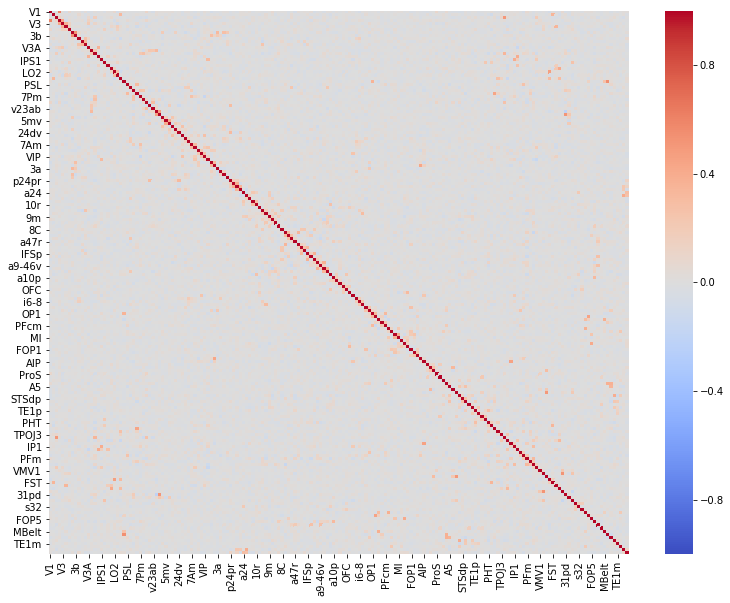

In [13]:
plt.figure(figsize=(13,10))
sns.heatmap(list(partial.values())[1][0], vmin=-1, vmax=1, cmap='coolwarm');

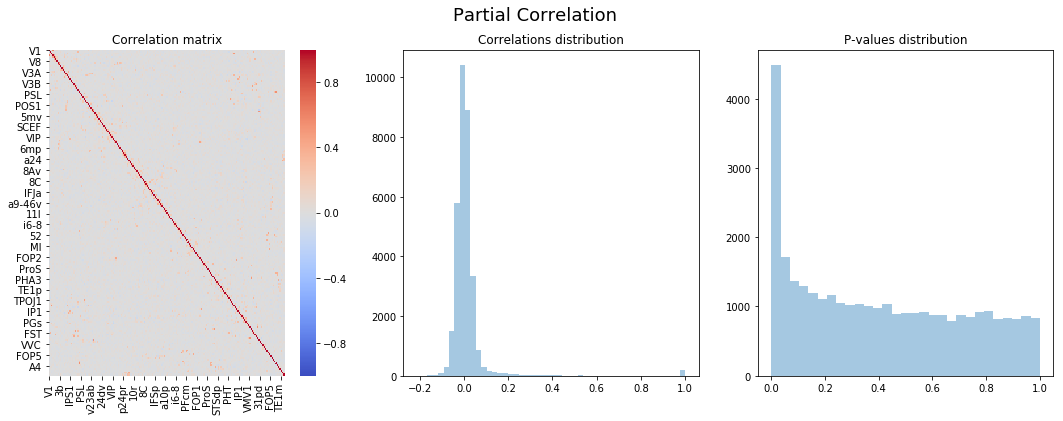

In [14]:
f, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(list(partial.values())[1][0], vmin=-1, vmax=1, cmap='coolwarm', ax=axes[0]);
sns.distplot(list(partial.values())[1][0].values.flatten(), kde=False, ax=axes[1]);
sns.distplot(list(partial.values())[1][1].values.flatten(), kde=False, ax=axes[2]);
axes[0].set_title('Correlation matrix');
axes[1].set_title('Correlations distribution');
axes[2].set_title('P-values distribution');
plt.suptitle('Partial Correlation', fontsize=18);

### Berkson's Paradox

In [15]:
x1 = np.random.randint(0,100,100)
x2 = np.random.randint(0,100,100)
x3 = 0.5*x1 + 0.5*x2

In [16]:
xxx = np.column_stack([x1,x2,x3])

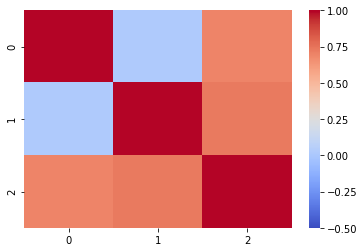

In [17]:
sns.heatmap(fc.pearson_corr(xxx)[0], vmin=-0.5, vmax=1, cmap='coolwarm');

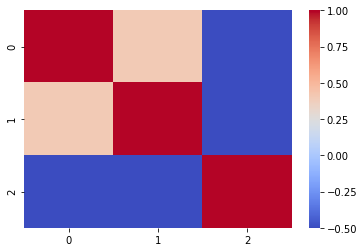

In [18]:
sns.heatmap(fc.partial_corr(xxx)[0], vmin=-0.5, vmax=1, cmap='coolwarm');

### Example on MEG data

In [19]:
path_meg = '../datasets/MEG/'

In [20]:
pearson_meg = {}
files = os.listdir(path_meg)
size = len(files)
for num, file in enumerate(files):
    if file.endswith('.csv'):
        pearson_meg[file[:-4]] = (pd.DataFrame(fc.pearson_corr(pd.read_csv(path_meg+file))[0]),
                              pd.DataFrame(fc.pearson_corr(pd.read_csv(path_meg+file))[1]))
    print('({}/{})'.format(num+1, size) + file + ' done!', end='\r', flush=True)

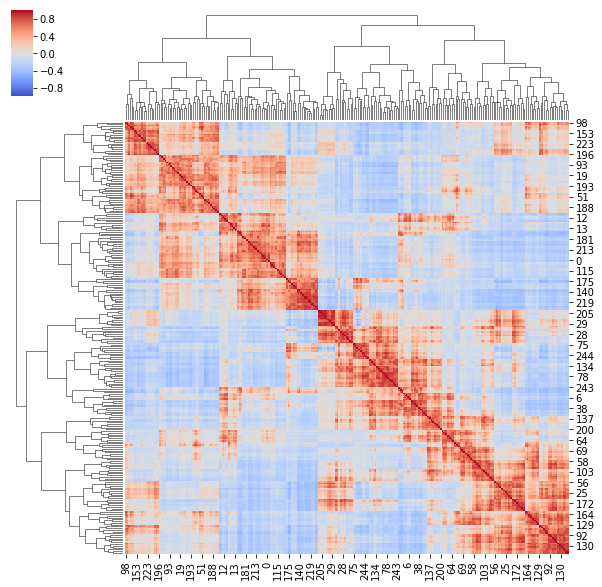

In [21]:
plt.figure(figsize=(13,10))
sns.clustermap(list(pearson_meg.values())[1][0], vmin=-1, vmax=1, cmap='coolwarm');

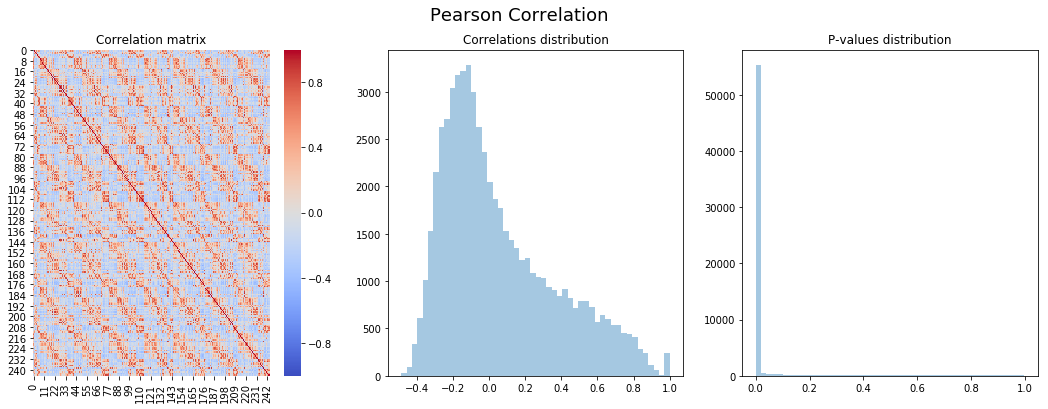

In [22]:
f, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(list(pearson_meg.values())[1][0], vmin=-1, vmax=1, cmap='coolwarm', ax=axes[0]);
sns.distplot(list(pearson_meg.values())[1][0].values.flatten(), kde=False, ax=axes[1]);
sns.distplot(list(pearson_meg.values())[1][1].values.flatten(), kde=False, ax=axes[2]);
axes[0].set_title('Correlation matrix');
axes[1].set_title('Correlations distribution');
axes[2].set_title('P-values distribution');
plt.suptitle('Pearson Correlation', fontsize=18);

In [23]:
partial_meg = {}
files = os.listdir(path_meg)
size = len(files)
for num, file in enumerate(files):
    if file.endswith('.csv'):
        partial_meg[file[:-4]] = (pd.DataFrame(fc.partial_corr(pd.read_csv(path_meg+file))[0]),
                              pd.DataFrame(fc.partial_corr(pd.read_csv(path_meg+file))[1]))
    print('({}/{})'.format(num+1, size) + file + ' done!', end='\r', flush=True)

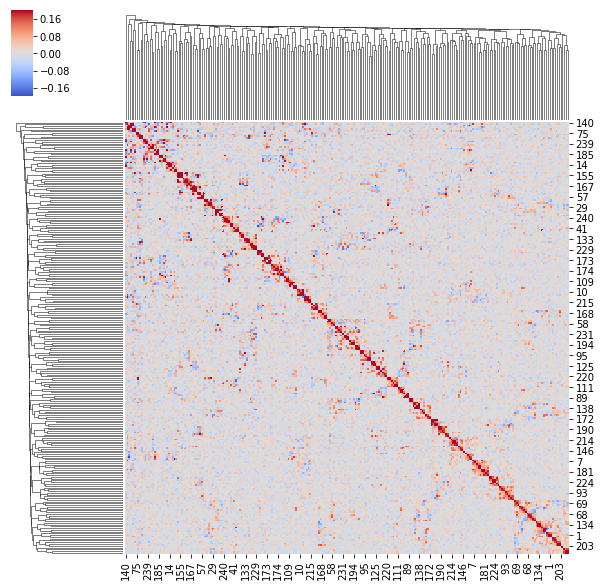

In [24]:
plt.figure(figsize=(13,10))
sns.clustermap(list(partial_meg.values())[1][0], vmin=-0.2, vmax=0.2, cmap='coolwarm');

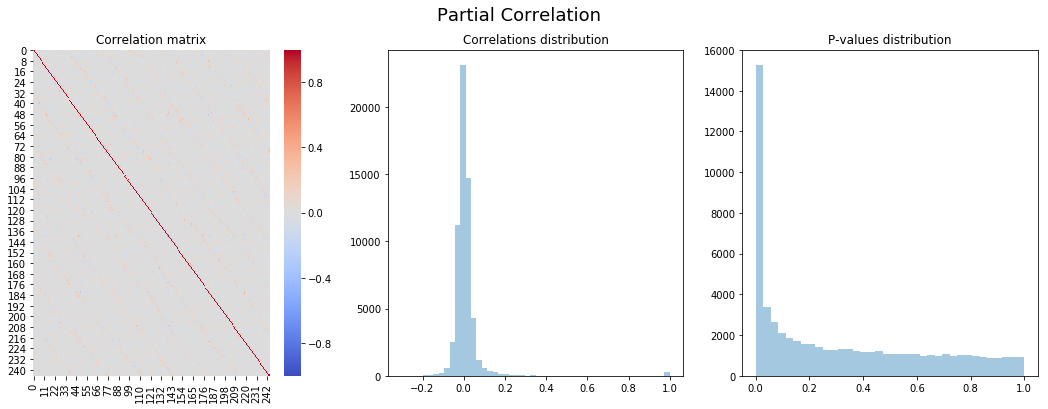

In [25]:
f, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(list(partial_meg.values())[1][0], vmin=-1, vmax=1, cmap='coolwarm', ax=axes[0]);
sns.distplot(list(partial_meg.values())[1][0].values.flatten(), kde=False, ax=axes[1]);
sns.distplot(list(partial_meg.values())[1][1].values.flatten(), kde=False, ax=axes[2]);
axes[0].set_title('Correlation matrix');
axes[1].set_title('Correlations distribution');
axes[2].set_title('P-values distribution');
plt.suptitle('Partial Correlation', fontsize=18);